# **Topic Modelling on BBC News Articles**
***
[BBC](https://www.bbc.com/) stands for British Broadcasting Corporation.

It is an operational business division of the British Broadcasting Corporation (BBC) responsible for the gathering and broadcasting of news and current affairs in the UK and around the world. The department is the world's largest broadcast news organisation and generates about 120 hours of radio and television output each day, as well as online news coverage.

The service maintains 50 foreign news bureaus with more than 250 correspondents around the world.

BBC News Online is the BBC's news website. It is one of the most popular news websites in the UK, reaching over a quarter of the UK's internet users, and worldwide, with around 14 million global readers every month. 

The website contains international news coverage as well as articles based on entertainment, sport, science, and political news.


## **Objective** 

In this project the task is to identify major themes/topics across a collection of BBC news articles. 

## Data Gathering and description
The Data provided is divided into 5 categories, that are, Sports, Tech, Business, Entertainment and Politics. Across these folders the data is stored in form of text files such that each text file contains the complete transcript of the article.

The dataset in this case isn't collective, it has been stored in form of numerous text files sub-categorized in 5 different domains. First I segregated the data by traversing all these folders and storing the data present in the files to a data-frame.

Following are the attributes of the dataset:

- Index: Entry index.
- Filename: Destination File name/number.
- Contents: Complete transcript of a article, this contains all the textual data present in the destination file for a particular entry.
- Category: Theme/domain of a article
</br>
</br>
The dataset is available at kaggle.

## Python Libraries used

#### Datawrangling and manipulation:
- Numpy
- Pandas

#### Visualization:
- Matplotib
- Seaborn
- Wordcloud
- TQDM
- IPython
 
#### Machine learning Models:
- Scikit-Learn (LDA)

#### Others:
- warnings
- collections
- NLTK
- ast

## Model Development
Here I've used the LDA (Latent Dirichlet Allocation) algorithm for modelling the topics on the BBC news articles.

These are the optimal LDA metrics that I got after implementing GridSearchCV:

- Best LDA model's params: {'n_components': 5}

- Best log likelihood Score for the LDA model: -643494.9704171557

- LDA model Perplexity on train data: 1696.6352006244963

## Notable Findings
- While reading the text files, I noticed that the file encoding was different in a few off-cases. Considering such factors, and engineering based on such knowledge, is very important while handling such data, in order to perform tasks efficiently.

- Upon experimenting with stemming and lemmatization on our dataset, I found that although it saves space and perhaps time, in our case, it's better to focus on quality, and avoid nuances. In my own 'cost-benefit' analysis, the difference weren't all that significant. Perhaps at a massive scale, the former approach would be ideal.

- Noticed that its more optimal to tokenize with no factual differences, hence lowercased the contents to unify tokens that may have just case-differences.

- Upon looking at the top n topics generated, I was able to correlate it with relevance to what was expected at a significant degree, whilst also shedding light on some unseen aspects. Hence, I see that the model effectively beared fruits.

## **Importing Neccessary Modules**

Now in this section we'll import all the neccessary libraries and packages we'll require to develop the required model.

In [3]:
# importing os module
import os

# importing CountVectorizer for feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# Importing data manipulation libraries
import numpy as np
import pandas as pd

# importing tqdm and display modules for progress meters/bars
from IPython.display import display
from tqdm import tqdm

# importing wordcloud to represent topics wordcloud
from wordcloud import WordCloud

# Model selection modules
from sklearn.model_selection import GridSearchCV

# Importing Counter
from collections import Counter

# import ast(abstract syntax tree)
import ast

# importing data visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

# importing mlab for implementing MATLAB functions
import matplotlib.mlab as mlab

# importing statistics module
import scipy.stats as stats

# importing TSNE for data exploration and visualizing high-dimensional data
from sklearn.manifold import TSNE

# importing decomposition modules
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

# importing Natural Language Toolkit and other NLP modules
import nltk
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob, Word

# importing countVectorizer for text vectorization
from sklearn.feature_extraction.text import CountVectorizer

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

## **Data Gathering and Discovery (EDA)**

Now we'll gather the data files and perform some basic operations to understand the data and how we can process it to improve the model performance. We will also apply some basic EDA to better understand the data.

In [7]:
# Importing the dataset
bbc = pd.read_csv(r'C:\Users\user\Datasets\bbc\bbc-news-data.csv', sep='\t')

In [117]:
#View the data
print(bbc)


      category filename                              title  \
0     business  001.txt  Ad sales boost Time Warner profit   
1     business  002.txt   Dollar gains on Greenspan speech   
2     business  003.txt  Yukos unit buyer faces loan claim   
3     business  004.txt  High fuel prices hit BA's profits   
4     business  005.txt  Pernod takeover talk lifts Domecq   
...        ...      ...                                ...   
2220      tech  397.txt   BT program to beat dialler scams   
2221      tech  398.txt    Spam e-mails tempt net shoppers   
2222      tech  399.txt            Be careful how you code   
2223      tech  400.txt    US cyber security chief resigns   
2224      tech  401.txt   Losing yourself in online gaming   

                                                content  
0      Quarterly profits at US media giant TimeWarne...  
1      The dollar has hit its highest level against ...  
2      The owners of embattled Russian oil giant Yuk...  
3      British Airways 

Note:- The dataset in this case isn't collective, its been stored in form of numerous text files sub-categorized in 5 different domains. Hence, for loading the data we'll visit all text files individually and copy all articles to a dataframe along with their category.

The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. There are over 2000 news article available in these categories.

In [8]:
# Display dataframe
bbc

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


The dataset consists of the following attributes:

- Index: Entry index.

- FileName: Destination File name/number.

- Contents: Complete transcript of a article, this contains all the textual data present in the destination file for a particular entry.

- Category: Theme/domain of a article.

In [9]:
# Size of dataset
bbc.shape

(2225, 4)

Now, lets check if a particular article is being stored more than once into the dataframe. Having duplicates in our data would cause inconsistencies in results.

In [10]:
# Checking for duplicate rows

bbc[bbc.duplicated(subset="content")]

,category,filename,title,content
239,business,240.txt,Economy 'strong' in election year,UK businesses are set to prosper during the n...
252,business,253.txt,Jobs growth still slow in the US,The US created fewer jobs than expected in Ja...
332,business,333.txt,Troubled Marsh under SEC scrutiny,The US stock market regulator is investigatin...
355,business,356.txt,S Korea spending boost to economy,South Korea will boost state spending next ye...
364,business,365.txt,Nasdaq planning $100m-share sale,The owner of the technology-dominated Nasdaq ...
...,...,...,...,...
2210,tech,387.txt,Progress on new internet domains,By early 2005 the net could have two new doma...
2211,tech,388.txt,Camera phones are 'must-haves',Four times more mobiles with cameras in them ...
2215,tech,392.txt,Broadband fuels online expression,Fast web access is encouraging more people to...
2216,tech,393.txt,Savvy searchers fail to spot ads,Internet search engine users are an odd mix o...


We can see there are 133 duplicate rows, it means that these articles are present more than once, we need to drop such rows before we proceed further with the model development.

In [11]:
# Dropping duplicate entries
bbc = bbc.drop_duplicates(subset=['content'], keep='first')
bbc

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2219,tech,396.txt,New consoles promise big problems,Making games for future consoles will require...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


In [122]:
# Size of dataset after removing duplicates
bbc.shape

(2092, 4)

### Categories
Now, lets see how many articles are there across all 5 categories.

In [12]:
# Grouping rows based on categories and counting number of entries
df = bbc.groupby(['category'])['category'].count()
df

category
business         500
entertainment    366
politics         395
sport            494
tech             337
Name: category, dtype: int64

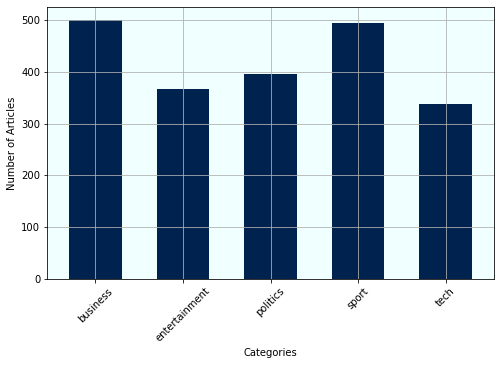

In [124]:
# Plotting a bar graph to represent all categories and number of articles in them 
df.plot(x = "category", kind = "bar", 
        figsize=(8,5), grid = True,
        xlabel = "Categories",
        ylabel = "Number of Articles",
        colormap= "cividis", width = 0.6, 
        rot = 45).patch.set_facecolor('#f0ffff')

We can see that Business and Sports category have the highest number of articles, while for Tech category the number is quite low. Number of articles will play a major role in determining the topics in them. Larger the number of articles for a category, higher will be the result satisfaction for the model.

### Contents
Reindexing the data and extracting just the contents of the article i.e, the complete transcript of the article.

In [14]:
# Reindexing the data
reindexed_data = bbc.reset_index()

# Extracting contents of all articles
reindexed_data = reindexed_data["content"]

# Display 
reindexed_data

0        Quarterly profits at US media giant TimeWarne...
1        The dollar has hit its highest level against ...
2        The owners of embattled Russian oil giant Yuk...
3        British Airways has blamed high fuel prices f...
4        Shares in UK drinks and food firm Allied Dome...
                              ...                        
2087     Making games for future consoles will require...
2088     BT is introducing two initiatives to help bea...
2089     A new European directive could put software w...
2090     The man making sure US computer networks are ...
2091     Online role playing games are time-consuming,...
Name: content, Length: 2092, dtype: object

As we can see the above dataset has got the complete set of articles, now we can use this dataset to count the top words with highest frequencies using <B>CountVectorizer.

### CountVectorizer (Top Words)
In order to use textual data for predictive modeling, the text must be parsed to remove certain words – this process is called Tokenization.

These words then need to be encoded as integers, or floating-point values, such that they can be used as inputs in machine learning algorithms. This process is called Feature Extraction (or Vectorization).

Scikit-learn’s CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample.

<i>Now that we know what CountVectorizer is, its time we implement it to gather the top-most occuring words in out dataset.

In [15]:
# Function to extract top n words with highest frequency
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    The function returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample as inputs
    '''
    # encoding the document using countvectorizer object
    vectorized_content = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_content, axis=0)

    # extracting specifics for words
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)

    # creating a vector matrix for words
    word_vectors = np.zeros((n_top_words, vectorized_content.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    # display Vector matrix
    print(word_vectors)

    # collect the words
    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

### Removing Stopwords using NLTK (Natural Language Toolkit)

<b>Stop Words:</b> A stop word is a commonly used word (such as “the”, “a”, “an”, “in”). Since these words occur a lot, a search engine has to be programmed to ignore them. We can easily remove them by storing a list of words that we consider to be stop words.

<b>NLTK(Natural Language Toolkit)</b> in python has a list of stopwords stored in 16 different languages. Hence we'll use it to extract our data without all such words.

In [4]:
# dowloading nltk stopwords module
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

We know that all of our articles are in english language, hence we'll only require stopwords in english.

In [5]:
# extracting all stopwords for english language
stpwrd = nltk.corpus.stopwords.words('english')

# list of stopwords in english language
stpwrd

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

##### Now lets implement our countvectorizer to extract top words with highest frequencies.

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


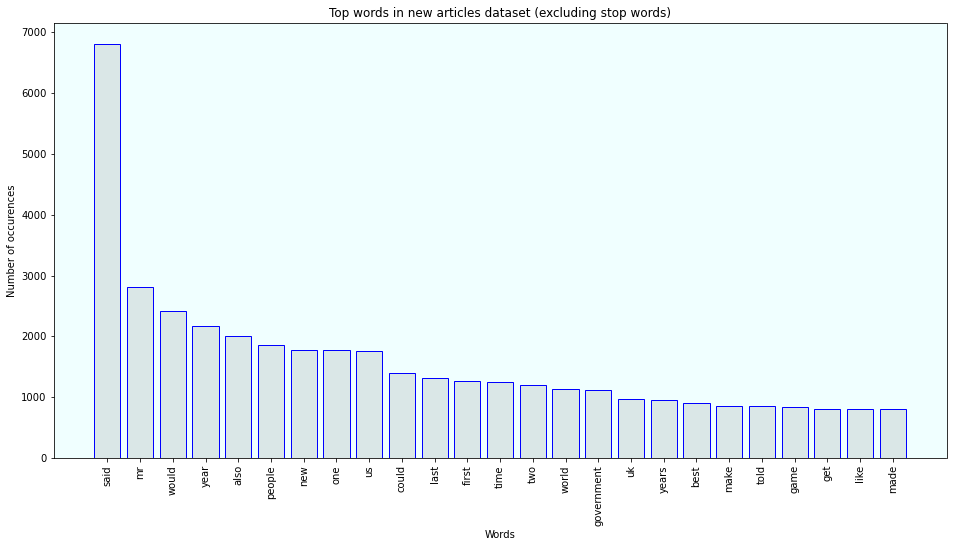

In [16]:
# creating vectorizer object
count_vectorizer = CountVectorizer(stop_words=stpwrd)

# calling the function to get words and their counts
words, word_values = get_top_n_words(n_top_words=25,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)

# display top 25 words using bar plot
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in new articles dataset (excluding stop words)')
ax.set_xlabel('Words')
ax.set_ylabel('Number of occurences')
ax.patch.set_facecolor('#f0ffff')
plt.show()

### Observations:

We can see some commonly used words like "said", "mr", "would" etc, are on top, which makes sense because no matter what the subject of a article is, these words help build up a sentence and hence the excessive use is inevitable.

However, we can also find a few words relevant to the categories of our articles. For example, 'UK' and 'US'(since we converted all words to lower case, 'us' represents US too) both are country names which could reflect to any of the categories. Also words like 'government' could reflect in articles related to Politics, Business, Tech etc.

The words like <b>'film' and 'game'</b> sounds relevant to the entertainment category.

### Stemming/Lemmatizing the data (Experimental)
<b>Stemming</b> is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).

<b>Lemmatization:</b> This algorithm collects all inflected forms of a word in order to break them down to their root dictionary form or lemma. Words are broken down into a part of speech (the categories of word types) by way of the rules of grammar.

In [17]:
# contents of articles
reindexed_data

0        Quarterly profits at US media giant TimeWarne...
1        The dollar has hit its highest level against ...
2        The owners of embattled Russian oil giant Yuk...
3        British Airways has blamed high fuel prices f...
4        Shares in UK drinks and food firm Allied Dome...
                              ...                        
2087     Making games for future consoles will require...
2088     BT is introducing two initiatives to help bea...
2089     A new European directive could put software w...
2090     The man making sure US computer networks are ...
2091     Online role playing games are time-consuming,...
Name: content, Length: 2092, dtype: object

### Wordnet Lemmatizer

In [18]:
# downloading wordNet lemmatizer
nltk.download(['wordnet','omw-1.4'])
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [19]:
# lemmatizing an article to see what wordnet returns
for rows in reindexed_data:
 print(rows)
 test = [lemmatizer.lemmatize(words) for words in rows.split(' ')]
 print(test)
 break

 Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.  The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.  Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-spe

### Now, lets try the lemmatization using Snowball Lemmatizer.

In [22]:
# making a lemmatizer object
sno = nltk.stem.SnowballStemmer('english')

In [23]:
# lemmatizing an article to see what snowball lemmatizer returns
for rows in reindexed_data:
 print(rows)
 test = [sno.stem(words) for words in rows.split(' ')]
 print(test)
 break

 Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.  The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.  Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-spe

### Now lets use TextBlob for the same.

In [24]:
# Lemmatizing using textblob
for rows in reindexed_data:
 print(rows)
 test = [Word(words).lemmatize() for words in rows.split(' ')]
 print(test)
 break

 Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.  The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.  Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's existing customers for high-spe

## Feature Extraction (Vectorization)
Vectorization is jargon for a classic approach of converting input data from its raw format (i.e. text ) into vectors of real numbers which is the format that ML models support.

The idea is to get some distinct features out of the text for the model to train on, by converting text to numerical vectors.

In [25]:
# creating a countvectorizer object
count_vectorizer = CountVectorizer(stop_words = stpwrd, max_features = 4000)

# text before vectorization 
text_sample = reindexed_data
print('Content before vectorization: {}'.format(text_sample[123]))

# encode the textual content
document_term_matrix = count_vectorizer.fit_transform(text_sample)

# text after vectorization
print('Content after vectorization: \n{}'.format(document_term_matrix[123]))

Content before vectorization:  Japanese communications firm Softbank has widened losses after heavy spending on a new cut-rate phone service.  The service, launched in December and dubbed "Otoku" or "bargain", has had almost 900,000 orders, Softbank said. The firm, a market leader in high-speed internet, had an operating loss for the three months to December of 7.5bn yen ($71.5m; £38.4m). But without the Otoku marketing spend it would have made a profit - and expects to move into the black in 2006. The firm did not give a figure for the extent of profits it expected to make next year. It was born in the 1990s tech boom, investing widely and becoming a fast-rising star, till the end of the tech bubble hit it hard. Its recent return to a high profile came with the purchase of Japan Telecom, the country's third-biggest fixed-line telecoms firm. The acquisition spurred its broadband internet division to pole position in the Japanese market, with more than 5.1 million subscribers at the end

We can see that the text was succesfully converted into a vectorized numeric form. The countvectorizer works as intended, we can now move forward to implement the ML model.

## Model Development
Now that all the necessary preprocessing is done, we'll implement the ML model for topic modeling on the BBC news articles. Here we have used the LDA algorithm for the purpose. Let’s discuss more about the algorithm and its specifics.

### Latent Dirichlet Allocation (LDA)
Latent Dirichlet Allocation (LDA) is one of most popular topic modeling technique to extract topics from a given corpus. The term latent conveys something that exists but is not yet developed. In other words, latent means hidden or concealed. The Dirichlet model describes the pattern of the words that are repeating together, occurring frequently, and these words are similar to each other.

And this stochastic process uses Bayesian inferences for explaining “the prior knowledge about the distribution of random variables”. In the case of topic modeling, the process helps in estimating what are the chances of the words, which are spread over the document, will occur again? This enables the model to build data points, estimate probabilities, that’s why LDA is a breed of generative probabilistic model.

LDA generates probabilities for the words using which the topics are formed and eventually the topics are classified into documents.

#### The LDA makes two key assumptions:

- Documents are a mixture of topics, and
- Topics are a mixture of tokens (or words)

The end goal of LDA is to find the most optimal representation of the Document-Topic matrix and the Topic-Word matrix to find the most optimized Document-Topic distribution and Topic-Word distribution.

As LDA assumes that documents are a mixture of topics and topics are a mixture of words so LDA backtracks from the document level to identify which topics would have generated these documents and which words would have generated those topics.

In [26]:
# hyperparameter tuning using Grid Search CV
grid_params = {'n_components' : [5]}

# creating LDA model object
lda = LatentDirichletAllocation()

# fitting the model
lda_model = GridSearchCV(lda, param_grid = grid_params)
lda_model.fit(document_term_matrix)

# best LDA model
best_lda_model = lda_model.best_estimator_
print("Best LDA model's params" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model",lda_model.best_score_)
print("LDA model Perplexity on train data", best_lda_model.perplexity(document_term_matrix))

Best LDA model's params {'n_components': 5}
Best log likelihood Score for the LDA model -624356.8279147388
LDA model Perplexity on train data 1630.8662842387723


In [27]:
# installing pyLDAvis to visualize the results of LDA model
!pip install pyLDAvis

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=f3d5848f07fd18505fe0e7ada68377d52e27078a0fccd51521ff9b8d5654bd2e
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\57\a4\86\d10c6c2e0bf149fbc0afb0aa5a6528ac35b30a133a0270c477
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=eff3d1e3968f6ee4fd3f22b810e44215987da3862f519112810bc2c4d2746050
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully b

In [28]:
# importing pyLDAvis module
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

Now lets visualize the results using pyLDAvis to get the better understanding of the model. This will show us the topics found for all 5 categories and how they're distributed based on preferences.

In [29]:
# generate and display the graph
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, document_term_matrix, count_vectorizer, mds='tsne')
lda_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2      150.222153  -72.269554       1        1  23.994710
1       51.163364 -159.968018       2        1  23.163559
4      -73.144554   21.523815       3        1  19.076001
3      -66.410133 -110.606438       4        1  18.901742
0       54.417324   12.443444       5        1  14.863989, topic_info=          Term         Freq        Total Category  logprob  loglift
2372        mr  2769.000000  2769.000000  Default  30.0000  30.0000
2385     music   738.000000   738.000000  Default  29.0000  29.0000
2046    labour   716.000000   716.000000  Default  28.0000  28.0000
1243  election   584.000000   584.000000  Default  27.0000  27.0000
1573      game   827.000000   827.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
3743       two   237.968721  1200.842311   Topic5  -5.4390   0.2876
3651      time   225.456024  1235.388494   Topic5  -5.4930   0.2052
3640     three   182.644976   781.208525   Topic5  -5.7036   0.4529
3960     world   182.201658  1124.787290   Topic5  -5.7060   0.0860
3972     would   174.017941  2391.444415   Topic5  -5.7520  -0.7143

[411 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.220526      000
0         2  0.229939      000
0         3  0.350959      000
0         4  0.014791      000
0         5  0.184220      000
...     ...       ...      ...
3987      4  0.175528    years
3987      5  0.250154    years
3988      3  0.980287      yen
3995      1  0.982975  yugansk
3997      1  0.994990    yukos

[840 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 5, 4, 1])

From the above graph we can see the top 30 term for each topic/category in our dataset. This represents the set of words most relevant to each category. Each term in here is extracted from a respective article set and based on their relevancy they're sorted out. Top 30 terms resembles keywords that were encountered the most throughout that category.

In [30]:
# creating docterms dataframe
docterms = lda_panel.token_table.sort_values(by = ['Freq'], ascending=False)

In [31]:
# display docterms df
docterms

,Topic,Freq,Term
term,,,
723,4,0.998426,chelsea
3795,1,0.998231,users
3673,2,0.997815,tories
715,5,0.996745,chart
2294,1,0.996709,microsoft
...,...,...,...
434,2,0.002859,bank
1215,1,0.002711,economic
3583,3,0.002616,team


Here we can see all the terms with their respective frequencies belonging to each topic/category. We can use this data to develop wordclouds for each topic to represent all relevant terms for that category.

#### Creating Dataframe to contain top 50 terms by topic.

In [32]:
# create topics dataframe
topicsdf = pd.DataFrame()

In [33]:
# adding top 50 most relevant terms for each topic to the dataframe
for i in range(1,6):
  Topicdict ={ "Topic":i, "Terms":list(docterms[docterms['Topic']==i]['Term'].head(50))  }
  topicsdf=topicsdf.append(Topicdict,ignore_index=True)
topicsdf

,Topic,Terms
0,1,"[users, microsoft, broadband, yukos, fraud, so..."
1,2,"[tories, dems, aviator, tory, lib, dem, actres..."
2,3,"[shares, profits, investors, exports, euros, g..."
3,4,"[chelsea, champions, cup, roddick, injury, gar..."
4,5,"[chart, song, album, robot, albums, ballet, u2..."


### Topic 1: Tech

In [34]:
# creating term freq dict for topic 1
t1dict = {}
for vals in docterms[docterms['Topic']==1].head(40).values:
  t1dict[vals[2]] =vals[1]
t1dict

{'users': 0.9982310494476777,
 'microsoft': 0.996708624592998,
 'broadband': 0.9957977417488022,
 'yukos': 0.9949901418893666,
 'fraud': 0.9935522638565619,
 'software': 0.99354421898995,
 'gazprom': 0.9928470912004645,
 'windows': 0.9922128524912087,
 'machines': 0.9917646059746656,
 'bt': 0.9910854717831906,
 'glazer': 0.9910530800233387,
 'mac': 0.9904270731515235,
 'spam': 0.9893816661294534,
 'xbox': 0.9891062401349046,
 'google': 0.9887240959832573,
 'programs': 0.98835158392991,
 'networks': 0.9870070685891791,
 'viruses': 0.9854633785958189,
 'ebbers': 0.9846615007469046,
 'rosneft': 0.983830629628968,
 'program': 0.9837235091344477,
 'yugansk': 0.9829750533977414,
 'sites': 0.9820368716603679,
 'websites': 0.9814956643650526,
 'worldcom': 0.9811785332995353,
 'ibm': 0.9802319061099749,
 'developers': 0.9802281361253354,
 'yahoo': 0.9771818002325514,
 'suspects': 0.9771796776011351,
 'dvds': 0.9771613070050265,
 'hd': 0.976088250382512,
 'speeds': 0.9760867711428958,
 'file': 0

In [35]:
# Generating the Wordcloud for topic 1
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='beige',
                min_font_size = 10).generate(' '.join(list(t1dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t1dict)

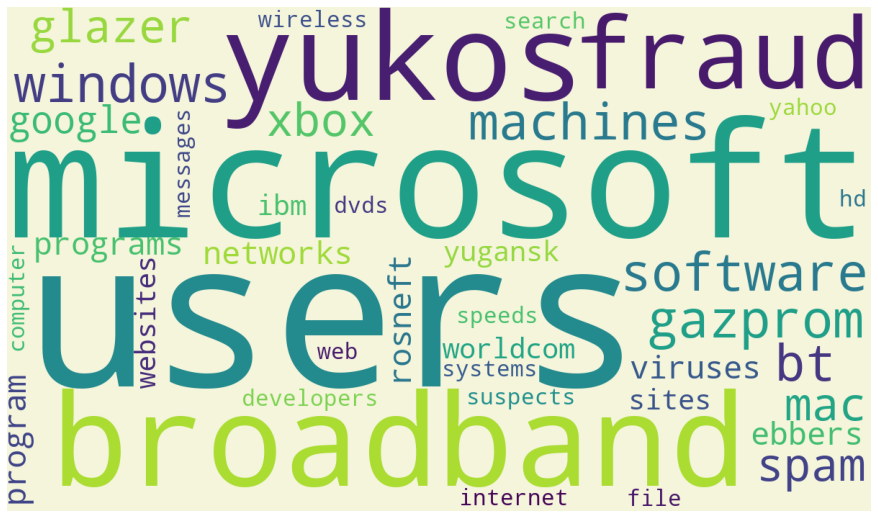

In [36]:
# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Topic 2: Politics

In [37]:
#creating term freq dict for topic 2
t2dict = {}
for vals in docterms[docterms['Topic']==2].head(40).values:
  t2dict[vals[2]] =vals[1]
t2dict

{'tories': 0.9978148707853518,
 'dems': 0.9958349540854607,
 'aviator': 0.9949972416321333,
 'tory': 0.9947852772391478,
 'lib': 0.9946054212710709,
 'dem': 0.993486411244915,
 'actress': 0.9932846294809754,
 'starring': 0.9928919695600393,
 'voters': 0.991955375340147,
 'oscar': 0.9904877749964401,
 'conservatives': 0.9888735614193638,
 'blair': 0.9877801708761822,
 'mp': 0.987372318143281,
 'manifesto': 0.9871461656176949,
 'election': 0.9866485805934322,
 'liberal': 0.9839303259444822,
 'leigh': 0.9838880674298174,
 'westminster': 0.9838772496759898,
 'poster': 0.9838701008867105,
 'scorsese': 0.9838680613414319,
 'actors': 0.9838654039398439,
 'elections': 0.983548026395829,
 'jewish': 0.9833133869488866,
 'electoral': 0.9827288533392415,
 'kennedy': 0.9815987054110796,
 'prescott': 0.9814703228770518,
 'staunton': 0.9814699084910788,
 'labour': 0.9806250470629085,
 'eastwood': 0.980074684648945,
 'sideways': 0.9800732618338143,
 'chancellor': 0.9789227664031892,
 'conservative': 0

In [38]:
# generating the wordcloud for topic 2
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='black',
                min_font_size = 10).generate(' '.join(list(t2dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t2dict)

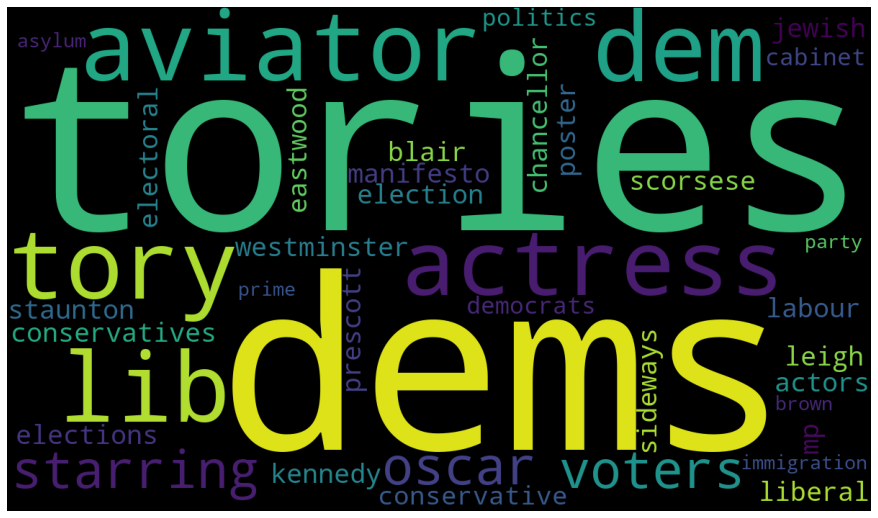

In [39]:
# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Topic 3: Business

In [40]:
# creating term freq dict for topic 3
t3dict = {}
for vals in docterms[docterms['Topic']==3].head(40).values:
  t3dict[vals[2]] =vals[1]
t3dict

{'shares': 0.9953268077832332,
 'profits': 0.9931040979971689,
 'investors': 0.9915969592824808,
 'exports': 0.9892262802798294,
 'euros': 0.9867841719377446,
 'gm': 0.9861268642783577,
 'economist': 0.9849788497102581,
 'fiat': 0.984767374730125,
 '6bn': 0.9834365150162362,
 'oil': 0.982443292211962,
 '8bn': 0.9822695661220899,
 'currency': 0.9822558783574935,
 'stock': 0.9816967766142497,
 '2bn': 0.9816503661417324,
 'securities': 0.9816499225510826,
 'imf': 0.9816460639944924,
 'yen': 0.9802866129600033,
 'creditors': 0.9786982656031225,
 'boeing': 0.9782594957730287,
 'lanka': 0.9757569842302165,
 'economists': 0.9751765624209122,
 '1bn': 0.9745000903671067,
 'gdp': 0.9739352073063808,
 'prices': 0.973435232179102,
 'shareholder': 0.9710688154921217,
 'merger': 0.9710359221819025,
 'lending': 0.9710320673106962,
 'rupees': 0.9701993072155892,
 '5bn': 0.9694782440899129,
 'airbus': 0.9693161972599701,
 'china': 0.968508141142553,
 'imports': 0.9673785735485956,
 'fuel': 0.9636826640

In [41]:
# generating the Wordcloud for topic 3
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='magenta',
                min_font_size = 10).generate(' '.join(list(t3dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t3dict)

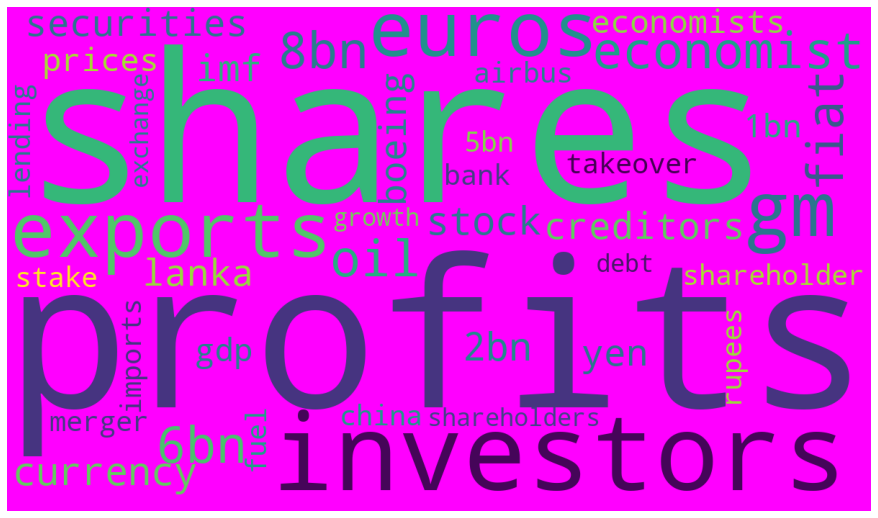

In [42]:
# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Topic 4: Sports

In [43]:
# creating term freq dict for topic 4
t4dict = {}
for vals in docterms[docterms['Topic']==4].head(40).values:
  t4dict[vals[2]] =vals[1]
t4dict

{'chelsea': 0.9984255638292779,
 'champions': 0.9958967242059419,
 'cup': 0.9955973583286946,
 'roddick': 0.9955674404336528,
 'injury': 0.9950750491214437,
 'gara': 0.9940638578374998,
 'wenger': 0.9940638419060019,
 'rangers': 0.9940638237548348,
 'barcelona': 0.9940635418570168,
 'rugby': 0.9938471817465291,
 'arsenal': 0.993322441945721,
 'squad': 0.9911395517688127,
 'robinson': 0.9896737071420924,
 'championships': 0.9895538233510829,
 'matches': 0.9892551439374275,
 'tournament': 0.988948582198402,
 'ferguson': 0.9883137170013262,
 'referee': 0.9879835466618844,
 'slam': 0.9872974116544119,
 'striker': 0.9858109423876054,
 'captain': 0.9857675304765792,
 'tennis': 0.9850043108976615,
 'championship': 0.9850039765662497,
 'mourinho': 0.9827697003859596,
 'finals': 0.9817765324111613,
 'nadal': 0.9807183969122222,
 'holmes': 0.9795872154360269,
 'andy': 0.9786614794506113,
 'fa': 0.9783790917809461,
 'indoor': 0.9773556837461271,
 'league': 0.9765916912685252,
 'hodgson': 0.976396

In [44]:
# generating the wordcloud for topic 4
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='cyan',
                min_font_size = 10).generate(' '.join(list(t4dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t4dict)

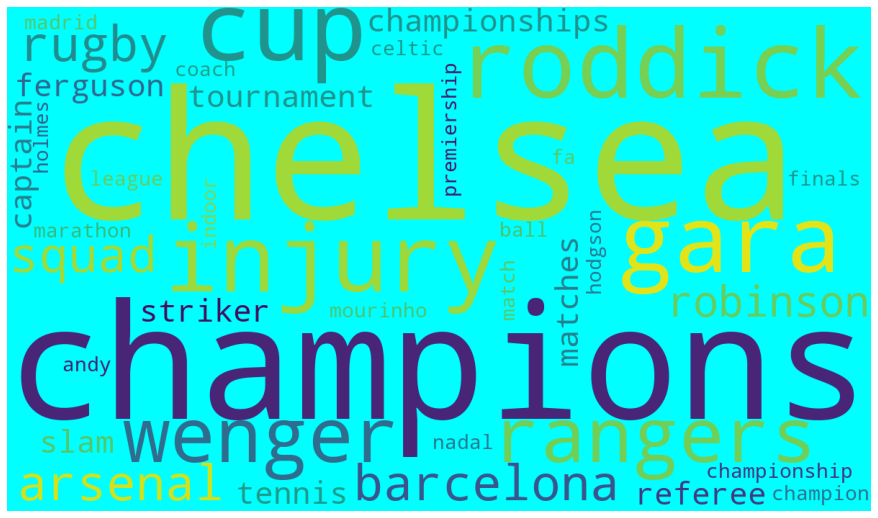

In [45]:
# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Topic 5: Entertainment

In [46]:
# creating term freq dict for topic 5
t5dict = {}
for vals in docterms[docterms['Topic']==5].head(40).values:
  t5dict[vals[2]] =vals[1]
t5dict

{'chart': 0.9967448002449029,
 'song': 0.9937231693122991,
 'album': 0.9936286989503167,
 'robot': 0.9885575204750129,
 'albums': 0.9885332616961631,
 'ballet': 0.9885326726950538,
 'u2': 0.9885132465817736,
 'rap': 0.9884616209806235,
 'vodafone': 0.9884389315787617,
 'euronext': 0.9884357695013573,
 'handset': 0.988422988363465,
 'joss': 0.9884180254578563,
 'musicians': 0.9884082825031222,
 'elvis': 0.9884051618531757,
 'mtv': 0.9883602728182468,
 'angels': 0.9883492529714898,
 'concert': 0.9883307018154992,
 'soul': 0.9883163133532417,
 'hop': 0.9883047220268831,
 'artist': 0.988283507569003,
 'thanou': 0.9882818834422,
 'charts': 0.9882679158665473,
 'handsets': 0.9882452708438519,
 'kenteris': 0.9882265201135264,
 'boerse': 0.988208791164153,
 'lse': 0.9881876627707524,
 '3g': 0.9881688769455195,
 'songs': 0.9881165339310499,
 'artists': 0.9881141279049789,
 'music': 0.9767886525405032,
 'rapper': 0.9631802117462704,
 'band': 0.9609430436980874,
 'gadget': 0.9572940555803657,
 'g

In [47]:
# generating the wordcloud for topic 5
wordcloud = WordCloud(width = 1200, height = 700,
                background_color ='maroon',
                min_font_size = 10).generate(' '.join(list(t5dict.keys())))
wordcloud = wordcloud.generate_from_frequencies(frequencies=t5dict)

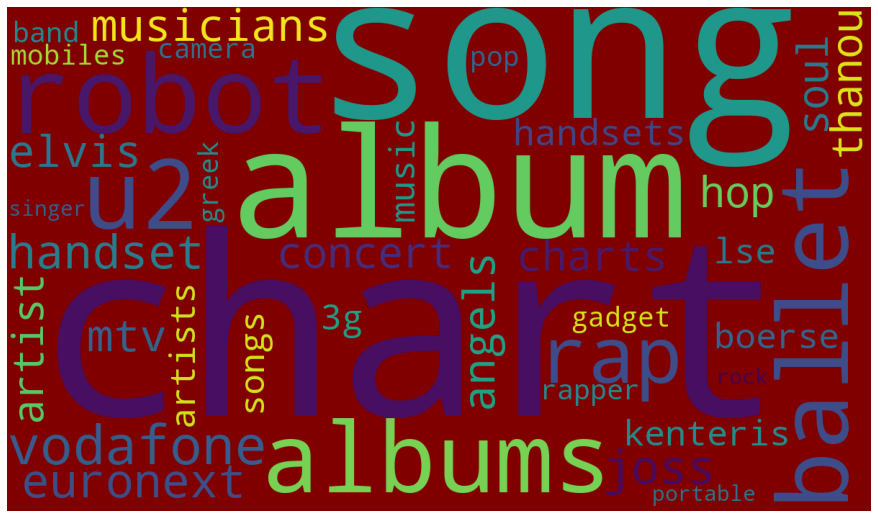

In [48]:
# plotting the WordCloud image                      
plt.figure(figsize = (12,7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()